![alt text](i.png)
# **YandexGPT**

In [4]:
from yandexgptlite import YandexGPTLite
account = YandexGPTLite('b1g40ih9vkcl3ce44hob', 'y0_AgAAAABDOmatAATuwQAAAAEM6u7IAAA3BzDC5OJHoImEL0vYxPon0E1tfQ')

`folder` - это ID папки на Yandex Cloud, в рамках которой вы общаетесь с моделью;   
`token` - полученный токен к вашему аккаунту на Яндексе;   
`prompt` - основной промпт;   
`temperature` - уровень творчества модели от 0 до 1 где 0 это максимально сухо, а 1 - это максимум творчества;   
`system_prompt` - системный промпт, где можно указывать стилистику ответа и другие пожелания не загружая основной промпт;   
`max_tokens` - ограничение расхода токенов (если кто-то захочет ограничить модель в использовании токенов);   
`model` - выбор своей модели: если вы используете дообученную модель, укажите "ds://<идентификатор_дообученной_модели>".   

In [5]:
text = account.create_completion(
    'Выдели ключевые слова из вопроса: "Вопрос спрашивает о сравнении уровня смертности в рамках программы помощи по КСГ (клинико-статистическая группа) 23.003 среди людей в возрасте от 15 до 49 лет в двух регионах: Чувашии и Удмуртской Республике, с целью определения, где зафиксировано больше смертей."',
    "1",
    system_prompt="отвечай на русском языке",
)
# print(text)

text

'**Ключевые слова:**\n\n- смертность;\n- программа помощи по КСГ 23.003;\n- возраст (15–49 лет);\n- регионы (Чувашия и Удмуртская Республика);\n- сравнение уровней смертности;\n- определение региона с наибольшим количеством смертей.'

### Бот

In [10]:
# BigTestingDotNew @DoctorApBot с синим цветочком
import pandas as pd
import numpy as np
import os
import sqlite3
import telebot
from telebot import types
from requests.exceptions import ConnectionError

# Токен
TOKEN = "7213028141:AAGztt3IBI8wDipz_gmXmbNhVagpnDqfwzU"  # token BigTestingDotNew
# Создание экземпляра бота
bot = telebot.TeleBot(TOKEN)

# меню (меню)
@bot.message_handler(commands=["start"])
def start(message):
    """меню бота"""
    try:
        # bot.delete_message(message.chat.id, message.message_id)
        bot.send_message(
            message.chat.id,
            text=f"""
            Здраствуйте, *{message.from_user.first_name}!*
    📖Этот чат-бот позволяет тестировать взаимодействие с *Yandex_GPT*""",
            parse_mode="Markdown",
        )
    except Exception as e:
        bot.send_message(message.chat.id, f"""🚫Общая ошибка: {e}
        ❗️Очистите историю, вернитесь в меню или обратитесь в службу поддержки""")

# обработка сообщений (не меню)
@bot.message_handler(content_types=["text"])
def handle_message(message):
    """обработка сообщений"""
    q = message.text
    aswer_ygpt = account.create_completion(
    f'Выдели ключевые слова из вопроса: "{q}?"',
    "1",
    system_prompt="отвечай на русском, не форматируй текст ответа",
    )
    bot.send_message(message.chat.id, f"Yandex GPT сказал: {aswer_ygpt}")

# запуск бота
bot.infinity_polling()

2024-08-09 13:06:32,935 (__init__.py:1102 MainThread) ERROR - TeleBot: "Infinity polling: polling exited"
2024-08-09 13:06:32,936 (__init__.py:1104 MainThread) ERROR - TeleBot: "Break infinity polling"


In [40]:
a = text.split("\n\n")[0]
lst = a.split(",")
lst
lst_a = []
for element in lst:
    element = "".join(x for x in element if x.isalnum() or x in [" ", "–", "-", "."])
    element = element.replace("Ключевые слова", "")
    lst_a.append(element)
b = ", ".join(lst_a)
b
text_2 = account.create_completion(
    f'Выдели ключевые слова из текста: "{b}"',
    "1",
    system_prompt="отвечай на русском языке",
)
text_2

'**Ключевые слова**: сравнение уровня смертности, программа помощи, КСГ 23.03, возраст, регионы, Чувашия, Удмуртская Республика.\n\nЭтот текст посвящён **сравнению уровня смертности в двух регионах** — **Чувашии и Удмуртской Республике**. Есть уточнение, что оба региона входят в возрастную категорию от 15 до 49 лет. Также упоминается **программа помощи по клинико-статистической группе (КСГ) 23.003**. \n\nВозможно, этот текст представляет статистические данные о смертности в этих регионах, а программа помощи является способом улучшения медицинской помощи в регионах с высоким уровнем смертности. Но для точного понимания смысла нужно прочитать весь текст.'

In [41]:
def simply(text):
    lst = text.split("\n\n")[0].split(",")
    lst_a = []
    for element in lst:
        element = "".join(x for x in element if x.isalnum() or x in [" ", "–", "-", "."])
        element = element.replace("Ключевые слова", "")
        lst_a.append(element)
    return ", ".join(lst_a)

In [60]:
# BigTestingDotNew @DoctorApBot с синим цветочком
import pandas as pd
import numpy as np
import os
import sqlite3
import telebot
from telebot import types
from requests.exceptions import ConnectionError


def simply(text):
    lst = text.split("\n\n")[0].split(",")
    lst_a = []
    for element in lst:
        element = "".join(
            x for x in element if x.isalnum() or x in [" ", "–", "-", "."]
        )
        element = (
            element.replace("Ключевые слова", "")
            .replace("ключевые слова", "")
            .replace("В этом тексте", "")
            .replace("В тексте", "")
            .replace("в этом тексте", "")
            .replace("в тексте", "")
            .replace("можно выделить", "")
            .replace("следующие", "")
            .replace("из текста", "")
        )
        lst_a.append(element)
    return ", ".join(lst_a)


def y_gpt(message):
    text = account.create_completion(
        f'Выдели ключевые слова из текста: "{message}?"',
        "1",
        system_prompt="отвечай на русском языке",
    )
    simply_text = simply(text)
    text_2 = account.create_completion(
        f'Выдели ключевые слова из текста: "{simply_text}"',
        "1",
        system_prompt="отвечай на русском языке",
    )
    # text_2
    return simply_text, simply(text_2)


# Токен
TOKEN = "7213028141:AAGztt3IBI8wDipz_gmXmbNhVagpnDqfwzU"  # token BigTestingDotNew
# Создание экземпляра бота
bot = telebot.TeleBot(TOKEN)


# меню (меню)
@bot.message_handler(commands=["start"])
def start(message):
    """меню бота"""
    try:
        # bot.delete_message(message.chat.id, message.message_id)
        bot.send_message(
            message.chat.id,
            text=f"""
            Здраствуйте, *{message.from_user.first_name}!*
    📖Этот чат-бот позволяет тестировать взаимодействие с *Yandex_GPT*""",
            parse_mode="Markdown",
        )
    except Exception as e:
        bot.send_message(
            message.chat.id,
            f"""🚫Общая ошибка: {e}
        ❗️Очистите историю, вернитесь в меню или обратитесь в службу поддержки""",
        )


# обработка сообщений (не меню)
@bot.message_handler(content_types=["text"])
def handle_message(message):
    """обработка сообщений"""
    aswer_ygpt_1, aswer_ygpt_2 = y_gpt(message.text)
    bot.send_message(
        message.chat.id,
        f"*Yandex GPT сперава сказал*: {aswer_ygpt_1}, *а засим добавил*: {aswer_ygpt_2}",
        parse_mode="Markdown",
    )


# запуск бота
bot.infinity_polling()

2024-08-08 17:25:23,589 (__init__.py:966 MainThread) ERROR - TeleBot: "Infinity polling: polling exited"
2024-08-08 17:25:23,589 (__init__.py:968 MainThread) ERROR - TeleBot: "Break infinity polling"


***
***
***

## **Линейная регрессия**

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_path = "C:/work/YandexGPT/reg_ref_model.csv"
df_data = pd.read_csv(data_path, sep=";")

def predicting(word):
    """прогноз"""
    predict_data = word
    tmp_list_predict = []
    for element in predict_data:
        element = " ".join([x for x in element])
        tmp_list_predict.append(element)
    predict_data = tmp_list_predict
    tknzr.fit_on_texts(predict_data)
    X_predict = tknzr.texts_to_sequences(predict_data)
    X_predict = sum(X_predict, [])
    lst_0 = [0]*(100-len(X_predict))
    for element in X_predict:
        lst_0.append(element)
    predict_data = lst_0
    predict_data = np.array([predict_data])
    try:
        return df_data[df_data["label"] == int(round(model_lr.predict(predict_data)[0], 0))].iloc[0, 0], df_data[df_data["label"] == int(round(model_lr.predict(predict_data)[0], 0))].iloc[0, 2]
    except Exception as e:
        return "НЕ РАСПОЗНАНО", 0

train_data = df_data["reg_name_rus"].tolist()
tmp_list = []
for element in train_data:
    element = " ".join([x for x in element])
    tmp_list.append(element)
train_data = tmp_list
tknzr = Tokenizer(lower=False, split=" ")
tknzr.fit_on_texts(train_data)
X_train = tknzr.texts_to_sequences(train_data)
train_data = sequence.pad_sequences(X_train, maxlen=100)

df_td = pd.DataFrame(train_data)
df_data_full = df_td.merge(df_data["label"], left_index=True, right_index=True, how="left")

X, y = df_data_full[df_data_full.columns[:-1]], df_data_full["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
print(f"СКО по train: {round(mean_squared_error (y_train, model_lr.predict(X_train)), 1)}, СКО по test: {round(mean_squared_error (y_test, model_lr.predict(X_test)), 1)}")

СКО по train: 693.6, СКО по test: 8.129170792960291e+21


In [2]:
label_list_lr = []
for element in df_data["reg_name_rus"].tolist():
    text, label = predicting(element)
    label_list_lr.append(label)
    print(element, " -> ", text, " -> ", label)
print(set(label_list_lr))
print(len(label_list_lr), len(set(label_list_lr)))

Алтайский  ->  Пермский  ->  44
алтайский  ->  Псков  ->  46
АЛТАЙСКИЙ  ->  Приморский  ->  45
Алтайский край  ->  Нижегородская  ->  36
алтайский край  ->  Нижегородская  ->  36
АЛТАЙСКИЙ КРАЙ  ->  Кемская волость  ->  37
Амур  ->  Адыгея  ->  47
амур  ->  Псков  ->  46
АМУР  ->  Псков  ->  46
Амурская  ->  Приморский  ->  45
амурская  ->  Приморский  ->  45
АМУРСКАЯ  ->  Приморский  ->  45
Амурская обл  ->  Приморский  ->  45
амурская обл  ->  Приморский  ->  45
АМУРСКАЯ ОБЛ  ->  Пермский  ->  44
Амурская обл.  ->  Приморский  ->  45
амурская обл.  ->  Приморский  ->  45
АМУРСКАЯ ОБЛ.  ->  Пермский  ->  44
Амурская область  ->  Пермский  ->  44
Амурская Область  ->  Пермский  ->  44
амурская область  ->  Пермский  ->  44
АМУРСКАЯ ОБЛАСТЬ  ->  Пенза  ->  43
Амурскаяобл  ->  Приморский  ->  45
амурскаяобл  ->  Приморский  ->  45
АМУРСКАЯОБЛ  ->  Пермский  ->  44
Амурскаяобл.  ->  Приморский  ->  45
амурскаяобл.  ->  Приморский  ->  45
АМУРСКАЯОБЛ.  ->  Пермский  ->  44
Амурскаяобласть 

In [5]:
str = "Серёжа Еремеев"
predicting(str)[0]

'Башкирия'

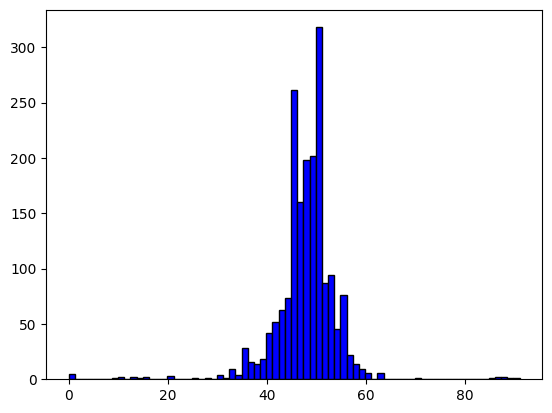

In [6]:
import matplotlib.pyplot as plt
df_ser_lr = pd.Series((v for v in label_list_lr))
plt.hist(df_ser_lr, color="blue", edgecolor="black", bins=len(df_ser_lr) // 25)
plt.show()

***
# **Наша нейросеть**
[Статья](https://tproger.ru/articles/pervoe-znakomstvo-s-nejronnymi-setjami-na-primere-tensorflow-2)

In [7]:
# библиотеки
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [8]:
data_train_path = "C:/work/YandexGPT/train_data.xlsx"
df_data_train = pd.read_excel(
    data_train_path, sheet_name="train_data", index_col=None, dtype="str"
)

df_data_train["label"] = df_data_train["label"].astype("int")
train_data = df_data_train["reg_name_rus"].tolist()

tmp_list = []
for element in train_data:
    element = " ".join([x for x in element])
    tmp_list.append(element)
train_data = tmp_list

tknzr = Tokenizer(lower=False, split=" ")
tknzr.fit_on_texts(train_data)
X_train = tknzr.texts_to_sequences(train_data)
train_data = sequence.pad_sequences(X_train, maxlen=100)

train_label = df_data_train["label"].tolist()
# n_classes = len(train_label)

train_data = np.array(train_data)
train_label = np.array(train_label)

X = train_data
Y = train_label

In [25]:
# Создадим модель
model = tf.keras.models.Sequential(
    [
        # tf.keras.layers.Input(shape=(100,)),
        tf.keras.layers.Dense(3, input_shape=(100,)),
        tf.keras.layers.Dense(15), # добавлено
        tf.keras.layers.Dense(15), # добавлено
        tf.keras.layers.Dropout(0.2), # добавлено
        tf.keras.layers.Dense(1),
    ]
)

# Скомпилируем
model.compile(optimizer="Adam", loss="mse", metrics=["mean_absolute_error"])

# Обучим
# model.fit(
#     X, # Набор входных данных
#     Y, # Набор правильных ответов
#     validation_split=0.2, # Этот параметр автоматически выделит часть обучающего набора на валидационные данные. В данном случа 20%
#     epochs=10, # Процесс обучения завершится после 10 эпох
#     batch_size = 8 # Набор данных будет разбит на пакеты (батчи) по 8 элементов набора в каждом.
# )

# Обратные выходы
# Если ошибка не уменьшается на протяжении указанного количества эпох, то процесс обучения прерывается и модель инициализируется весами с самым низким показателем параметра "monitor"
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",  # указывается параметр, по которому осуществляется ранняя остановка. Обычно это функция потреть на валидационном наборе (val_loss)
    patience=10,  # количество эпох по истечении которых закончится обучение, если показатели не улучшатся
    mode="min",  # указывает, в какую сторону должна быть улучшена ошибка
    restore_best_weights=True,  # если параметр установлен в true, то по окончании обучения модель будет инициализирована весами с самым низким показателем параметра "monitor"
)

model.fit(
    X,
    Y,
    validation_split=0.2,
    epochs=50,
    batch_size=8,
    callbacks=early_stopping,
)

Epoch 1/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1367.0497 - mean_absolute_error: 30.2463 - val_loss: 2973.2957 - val_mean_absolute_error: 52.5965
Epoch 2/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 788.5673 - mean_absolute_error: 22.8459 - val_loss: 2399.7634 - val_mean_absolute_error: 46.6796
Epoch 3/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 738.2292 - mean_absolute_error: 22.0212 - val_loss: 2827.3604 - val_mean_absolute_error: 51.3236
Epoch 4/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 693.8911 - mean_absolute_error: 21.3096 - val_loss: 2822.5781 - val_mean_absolute_error: 51.2473
Epoch 5/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 688.8681 - mean_absolute_error: 21.2520 - val_loss: 2570.2234 - val_mean_absolute_error: 48.6899
Epoch 6/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 647.1102 - mean_absolute_error: 20.8649 - val_loss: 2556.4058 - val_mean_absolute_error: 48.7730
Epoch 7/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - l

In [26]:
# оценка модели
X_test = np.array(np.random.random((100, 100)))
Y_test = np.array(np.random.random((100)))

res = model.evaluate(X_test, Y_test)
print("loss and mean_absolute_error", res)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6557 - mean_absolute_error: 0.6275 
loss and mean_absolute_error [0.6797804236412048, 0.6475805640220642]


In [34]:
# Подготовка прогнозирования
data = "Красноярск"

def predict(data):
    predict_data = data
    tmp_list_predict = []
    for element in predict_data:
        element = " ".join([x for x in element])
        tmp_list_predict.append(element)
    predict_data = tmp_list_predict
    tknzr.fit_on_texts(predict_data)
    X_predict = tknzr.texts_to_sequences(predict_data)
    X_predict = sum(X_predict, [])
    lst_0 = [0]*(100-len(X_predict))
    for element in X_predict:
        lst_0.append(element)
    predict_data = lst_0
    predict_data = np.array([predict_data])
    predictions = model.predict(predict_data)
    return int(round(predictions[0][0], 0))

print(predict(data))
try:
    print(df_data_train[df_data_train["label"] == predict(data)].iloc[0,0])
except IndexError:
    print("трабл")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Иваново


In [19]:
label_list = []
df_data = df_data_train.copy()
for element in df_data["reg_name_rus"].tolist():
    label = predict(element)
    label_list.append(label)
    try:
        region = df_data_train[df_data_train["label"] == label].iloc[0,0]
    except IndexError:
        region = "НЕ РАСПОЗНАН"
    print(element, " -> ", region, " -> ", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Алтайский  ->  Орел  ->  42
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
алтайский  ->  Пенза  ->  43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
АЛТАЙСКИЙ  ->  Пермский  ->  44
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Алтайский край  ->  г Москва  ->  33
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
алтайский край  ->  Мурманск  ->  34
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
АЛТАЙСКИЙ КРАЙ  ->  Мурманск  ->  34
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Амур  ->  Орел  ->  42
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
амур  ->  Омск  ->  40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
АМУР  ->  Пенза  ->  43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Амурская  ->  Кемская волость  ->  37
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
амурская  ->  Великий Новгород  ->  38
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
АМУРСКАЯ  ->  Омск  ->  40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Амурская обл  ->  Омск  ->  40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
амурская обл  ->  Омск  ->  40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/

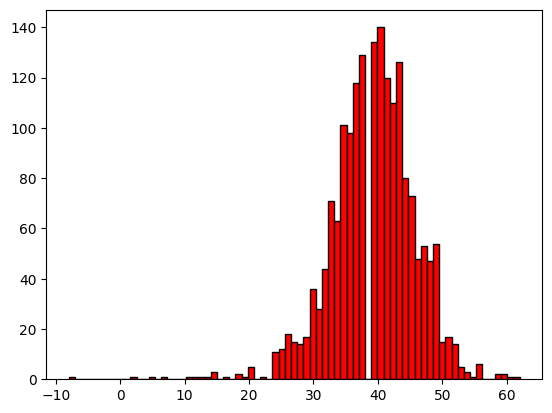

In [20]:
import matplotlib.pyplot as plt
df_ser = pd.Series((v for v in label_list))
plt.hist(df_ser, color="red", edgecolor="black", bins=len(df_ser) // 25)
plt.show()

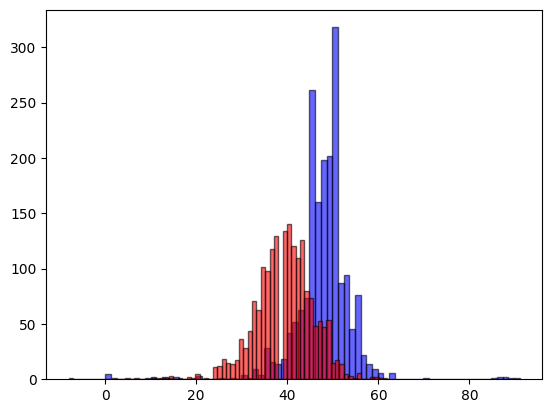

In [21]:
df_ser_lr = pd.Series((v for v in label_list_lr))
plt.hist(df_ser_lr, color="blue", edgecolor="black", bins=len(df_ser_lr) // 25, alpha=0.6,)
plt.hist(df_ser, color="red", edgecolor="black", bins=len(df_ser) // 25, alpha=0.6,)
plt.show()

In [24]:
%load_ext tensorboard
%tensorboard --logdir "log"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.